0.00025


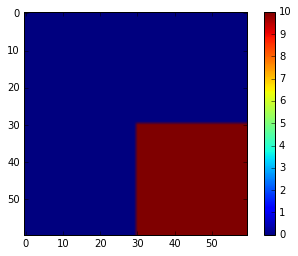

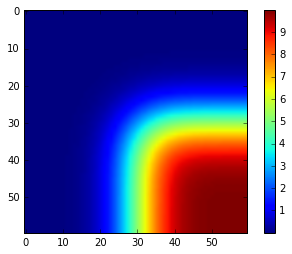

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dx = 0.1

_, _, Z = axes3d.get_test_data(dx)

Z = np.zeros_like(Z)
Z[int(len(Z)/2):,int(len(Z)/2):] = 10.

# x = np.arange(0,len(Z)*dx,dx)
# y = np.arange(0,len(Z)*dx,dx)

# xv, yv = np.meshgrid(x, y)

# Sx, Sy = np.gradient(Z)

# plt.imshow(Z, cmap = 'terrain')
# plt.colorbar()
# plt.show()
# plt.imshow(Sx)
# plt.colorbar()
# plt.show()
# plt.imshow(Sy)
# plt.colorbar()
# plt.show()

D = 10.
dt = (1/(2*D))*(dx**4/(2*dx**2))
print dt

maxt = 100

# plt.imshow(Z, clim = [-75,85])
plt.imshow(Z)
plt.colorbar()
plt.show()

for t in range(maxt):
    
    old_Z = Z.copy()

    for i in range(1,len(Z)-1):
        for j in range(1,len(Z)-1):

            Zxx = (old_Z[i+1,j] - 2 * old_Z[i,j] + old_Z[i-1,j]) / dx**2
            Zyy = (old_Z[i,j+1] - 2 * old_Z[i,j] + old_Z[i,j-1]) / dx**2
            Z[i,j] = old_Z[i,j] + dt * D * (Zxx + Zyy)
            
    
    Z[0,:] = Z[1,:]
    Z[-1,:] = Z[-2,:]
    Z[:,0] = Z[:,1]
    Z[:,-1] = Z[:,-2]


# plt.imshow(Z, clim = [-75,85])
plt.imshow(Z)
plt.colorbar()
plt.show()

In [42]:
from osgeo import gdal

src = gdal.Open('USGS_NED_13_n41w106_GridFloat/usgs_ned_13_n41w106_gridfloat.flt')

topo = src.ReadAsArray()
src = None

smalltopo = topo[3000:4000:2,500:1500:2]

np.savetxt('topo.asc',smalltopo,delimiter=',',fmt='%5.4f')

In [4]:
import numpy as np

topo = np.loadtxt('topo.asc',delimiter=',')

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

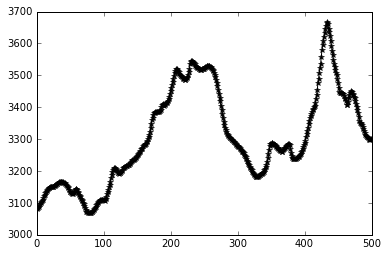

In [71]:
profile = topo[:,120]

plt.plot(profile, 'k*-')

0 3665.460225
100 3601.77047584
200 3572.04622929
300 3552.31138515
400 3537.67429355
500 3526.06340391
600 3516.41325574
700 3509.66392792
800 3506.69908396
900 3503.71801554
1000 3500.78638231
1100 3497.86610419
1200 3494.99893215
1300 3492.18016126
1400 3489.40294997
1500 3486.67706501
1600 3484.02005696
1700 3481.41235042
1800 3478.85548324
1900 3476.35023766
2000 3473.896841
2100 3471.50050427
2200 3469.16057751
2300 3466.86959568
2400 3464.62684476
2500 3462.43147214
2600 3460.28252453
2700 3458.17897756
2800 3456.11975913
2900 3454.10376778
3000 3452.12988717
3100 3450.19699759
3200 3448.30398498
3300 3446.44974795
3400 3444.63320329
3500 3442.85329011
3600 3441.1089729
3700 3439.39924384
3800 3437.72312426
3900 3436.07966563
4000 3434.46795003
4100 3432.88709028
4200 3431.33622975
4300 3429.81454196
4400 3428.32122994
4500 3426.85552552
4600 3425.41668849
4700 3424.00400566
4800 3422.6167899
4900 3421.25437916


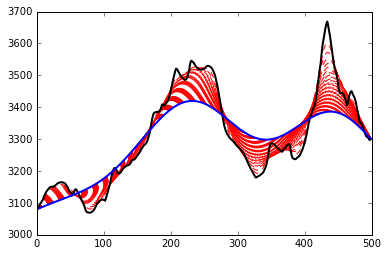

In [149]:
oldProfile = profile.copy()
newProfile = profile.copy()
# newProfile.shape

dx = 2 # degrees
D = 1
dt = 1
maxt = 5000

# plt.plot(profile,'r', hold=True)

for t in range(maxt):
    
    oldProfile = newProfile.copy()

    for i in range(1,len(profile)-1):

        dxx = (oldProfile[i+1] - 2 * oldProfile[i] + oldProfile[i-1]) / dx**2

        newProfile[i] = oldProfile[i] + dt * D * dxx
        
    newProfile[0] = profile[0]
    newProfile[-1] = profile[-1]
        
    if t%100==0:
        plt.plot(newProfile, 'r--', hold=True)
        print t, newProfile.max()


plt.plot(profile,'k-', linewidth=2)
plt.plot(newProfile,'b-', linewidth=2)
    

In [150]:
np.save('profile_'+str(t), newProfile)

In [152]:
p4999 = np.load('profile_4999.npy')

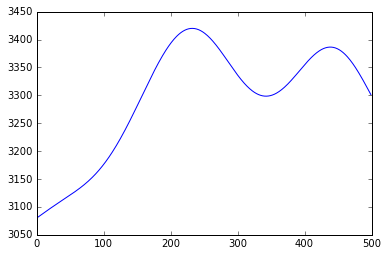

In [153]:
plt.plot(p4999)

In [24]:
def is_prime(number):
    if number > 1:
        if number == 2:
            return True
        if number % 2 == 0:
            return False
        for current in range(3, int(math.sqrt(number) + 1), 2):
            if number % current == 0: 
                return False
        return True
    return False


def get_primes(number):
    while True:
        if is_prime(number):
            yield number
        number += 1 # <<<<<<<<<<
        
        
def solve_number_10():
    # She *is* working on Project Euler #10, I knew it!
    total = 2
    for next_prime in get_primes(3):
        print next_prime
        if next_prime < 100:
            total += next_prime
        else:
            print(total)
            return

In [25]:
solve_number_10()

3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
1060


In [28]:
some_guy = 'Fred'

first_names = []
first_names.append(some_guy)

another_list_of_names = first_names
another_list_of_names.append('George')

print(some_guy is first_names[0])

some_guy = 'Bill'

print (some_guy, first_names, another_list_of_names)

print(some_guy is first_names[0])

True
('Bill', ['Fred', 'George'], ['Fred', 'George'])
False


In [33]:
first_names = ['Fred', 'George', 'Bill']
last_names = ['Smith', 'Jones', 'Williams']
name_tuple = (first_names, last_names)
a = first_names
print name_tuple

first_names.append('Igor')

print name_tuple
print first_names
print a is first_names


(['Fred', 'George', 'Bill'], ['Smith', 'Jones', 'Williams'])
(['Fred', 'George', 'Bill', 'Igor'], ['Smith', 'Jones', 'Williams'])
['Fred', 'George', 'Bill', 'Igor']
True


In [1]:
odds = [1, 3, 5, 9, 11]

In [3]:
13 not in odds

True